<a href="https://colab.research.google.com/github/ChonChanokAng/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

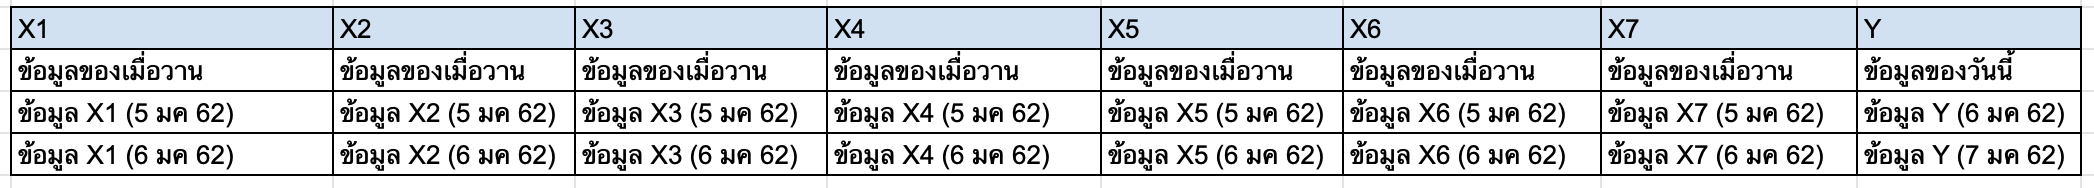

นางสาวชนม์ชนก อังคุระษี 643021263-1

In [799]:
import pandas as pd
import numpy as np

In [800]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##ความกด(เปอร์เซ็นต์)

In [801]:
press_KKN= pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
press_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
press_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
press_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
press_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [802]:
#ทำให้ (-) เป็นค่า missing
press_KKN = press_KKN.replace('-', np.nan)
press_NPM = press_NPM.replace('-', np.nan)
press_SNK = press_SNK.replace('-', np.nan)
press_NKI = press_NKI.replace('-', np.nan)
press_LEI = press_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [803]:
press_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [804]:
press_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667


In [805]:
press_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [806]:
press_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,NaN,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.50,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,NaN,1010.608000


In [807]:
press_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [808]:
press_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,NaN,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,NaN,1010.554000


In [809]:
press_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [810]:
press_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,NaN,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,NaN,1010.214667


In [811]:
press_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [812]:
press_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,NaN,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.40,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,NaN,1009.516667


#####เปลี่ยนชื่อ column

In [813]:
press_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [814]:
press_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645


In [815]:
press_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839


In [816]:
press_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.8,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258


In [817]:
press_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.5,1012.81,1011.88,1011.77,1012.18,1010.580645


In [818]:
press_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.0,1012.74,1011.69,1011.27,1011.71,1010.343871


In [819]:
#แทนค่า mean ลงไปใน missing
for i in range(len(press_KKN['ที่'])):press_KKN.iloc[i,:]=press_KKN.iloc[i,:].fillna(press_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_NPM['ที่'])):press_NPM.iloc[i,:]=press_NPM.iloc[i,:].fillna(press_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_SNK['ที่'])):press_SNK.iloc[i,:]=press_SNK.iloc[i,:].fillna(press_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_NKI['ที่'])):press_NKI.iloc[i,:]=press_NKI.iloc[i,:].fillna(press_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_LEI['ที่'])):press_LEI.iloc[i,:]=press_LEI.iloc[i,:].fillna(press_LEI.iloc[i]['ค่าเฉลี่ย'])

In [820]:
#ตรวจสอบ missing
press_KKN.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [821]:
press_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


In [822]:
press_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [823]:
press_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1012.184667,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1010.608000,1010.608000


In [824]:
press_SNK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [825]:
press_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


In [826]:
press_NKI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [827]:
press_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


In [828]:
press_LEI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [829]:
press_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


##ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [830]:
rh_KKN= pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
rh_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
rh_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
rh_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
rh_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [831]:
#ทำให้ (-) เป็นค่า missing
rh_KKN = rh_KKN.replace('-', np.nan)
rh_NPM = rh_NPM.replace('-', np.nan)
rh_SNK = rh_SNK.replace('-', np.nan)
rh_NKI = rh_NKI.replace('-', np.nan)
rh_LEI = rh_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [832]:
rh_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [833]:
rh_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,NaN,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,NaN,NaN,65


In [834]:
rh_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [835]:
rh_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,NaN,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,NaN,NaN,65


In [836]:
rh_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [837]:
rh_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,NaN,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,NaN,NaN,64


In [838]:
rh_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [839]:
rh_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,NaN,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,NaN,NaN,69


In [840]:
rh_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [841]:
rh_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,NaN,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,NaN,NaN,73


#####เปลี่ยนชื่อ column

In [842]:
rh_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [843]:
rh_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79


In [844]:
rh_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77


In [845]:
rh_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78


In [846]:
rh_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76


In [847]:
rh_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87


In [848]:
#แทนค่า mean ลงไปใน missing
for i in range(len(rh_KKN['ที่'])):rh_KKN.iloc[i,:]=rh_KKN.iloc[i,:].fillna(rh_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_NPM['ที่'])):rh_NPM.iloc[i,:]=rh_NPM.iloc[i,:].fillna(rh_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_SNK['ที่'])):rh_SNK.iloc[i,:]=rh_SNK.iloc[i,:].fillna(rh_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_NKI['ที่'])):rh_NKI.iloc[i,:]=rh_NKI.iloc[i,:].fillna(rh_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_LEI['ที่'])):rh_LEI.iloc[i,:]=rh_LEI.iloc[i,:].fillna(rh_LEI.iloc[i]['ค่าเฉลี่ย'])

In [849]:
rh_KKN.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [850]:
rh_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


In [851]:
rh_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [852]:
rh_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65


In [853]:
rh_SNK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [854]:
rh_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,70.0,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,64.0,64.0,64


In [855]:
rh_NKI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [856]:
rh_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69


In [857]:
rh_LEI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [858]:
rh_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73


##ความเร็วลม(นอต)

In [859]:
ws_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
ws_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
ws_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
ws_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
ws_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [860]:
#ทำให้ (-) เป็นค่า missing
ws_KKN = ws_KKN.replace('-', np.nan)
ws_NPM = ws_NPM.replace('-', np.nan)
ws_SNK = ws_SNK.replace('-', np.nan)
ws_NKI = ws_NKI.replace('-', np.nan)
ws_LEI = ws_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [861]:
ws_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3               True
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21              True
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [862]:
ws_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.0,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.0,3,5,2,3,...,7,6,5,5,3,1,3.0,3.0,NaN,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.0,4,4,4,4,...,5,6,7,6,5,4,4.0,6.0,5.0,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.0,4,4,2,4,...,3,3,4,2,2,1,3.0,4.0,4.0,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.0,2,3,1,2,...,1,2,3,2,4,3,3.0,3.0,NaN,2.566667


In [863]:
ws_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4               True
5               True
6              False
7               True
8               True
9              False
10              True
11              True
12              True
13             False
14             False
15              True
16              True
17             False
18              True
19             False
20              True
21              True
22              True
23             False
24              True
25              True
26             False
27             False
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [864]:
ws_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,NaN,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,NaN,2.200000


In [865]:
ws_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4               True
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20              True
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [866]:
ws_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,NaN,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.0,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,NaN,2.733333


In [867]:
ws_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4               True
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [868]:
ws_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.0,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,NaN,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.0,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.0,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,NaN,2.733333


In [869]:
ws_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5               True
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16              True
17             False
18             False
19              True
20             False
21             False
22             False
23             False
24              True
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [870]:
ws_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,NaN,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,NaN,1.700000


#####เปลี่ยนชื่อ column

In [871]:
ws_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [872]:
ws_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.0,3.354839


In [873]:
ws_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581


In [874]:
ws_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.0,1.322581


In [875]:
ws_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.0,2.580645


In [876]:
ws_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903


In [877]:
#แทนค่า mean ลงไปใน missing
for i in range(len(ws_KKN['ที่'])):ws_KKN.iloc[i,:]=ws_KKN.iloc[i,:].fillna(ws_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_NPM['ที่'])):ws_NPM.iloc[i,:]=ws_NPM.iloc[i,:].fillna(ws_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_SNK['ที่'])):ws_SNK.iloc[i,:]=ws_SNK.iloc[i,:].fillna(ws_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_NKI['ที่'])):ws_NKI.iloc[i,:]=ws_NKI.iloc[i,:].fillna(ws_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_LEI['ที่'])):ws_LEI.iloc[i,:]=ws_LEI.iloc[i,:].fillna(ws_LEI.iloc[i]['ค่าเฉลี่ย'])

In [878]:
ws_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.000000,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.0,3,5,2,3,...,7,6,5,5,3,1,3.0,3.0,3.466667,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.0,4,4,4,4,...,5,6,7,6,5,4,4.0,6.0,5.000000,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.0,4,4,2,4,...,3,3,4,2,2,1,3.0,4.0,4.000000,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.0,2,3,1,2,...,1,2,3,2,4,3,3.0,3.0,2.566667,2.566667


In [879]:
ws_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,1.2,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,2.2,2.200000


In [880]:
ws_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


In [881]:
ws_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


In [882]:
ws_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


##จำนวนเมฆ(10ส่วน)

In [883]:
cloud_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
cloud_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
cloud_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
cloud_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
cloud_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

In [884]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [885]:
#ลบ column ที่เกินออกมาของจังหวัดเลย
cloud_LEI = cloud_LEI.dropna(axis=1)

In [886]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


####แก้ไขค่า missing

In [887]:
#ทำให้ (-) เป็นค่า missing
cloud_KKN = cloud_KKN.replace('-', np.nan)
cloud_NPM = cloud_NPM.replace('-', np.nan)
cloud_SNK = cloud_SNK.replace('-', np.nan)
cloud_NKI = cloud_NKI.replace('-', np.nan)
cloud_LEI = cloud_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [888]:
cloud_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3               True
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21              True
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [889]:
cloud_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.0,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,NaN,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.0,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.0,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,NaN,2.533333


In [890]:
cloud_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11             False
12             False
13              True
14              True
15              True
16             False
17             False
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26             False
27              True
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [891]:
cloud_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.0,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,NaN,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.0,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.0,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,NaN,2.966667


In [892]:
cloud_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [893]:
cloud_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,4.0,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.0,2.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.0,1.0,0.0,3.0,0.0,1.0,4.0,7.0,8.0,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,1.0,6.0,4.0,0.0,0.0,NaN,2.142857


In [894]:
cloud_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [895]:
cloud_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.0,9.0,9.0,10.0,10.0,...,3.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.0,1.0,1.0,2.0,6.0,...,6.0,6.0,NaN,0.0,1.0,2.0,4.0,2.0,NaN,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,NaN,2.0,7.0,5.0,5.0,...,2.0,8.0,1.0,NaN,3.0,1.0,1.0,3.0,NaN,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,8.0,2.0,3.0,...,8.0,5.0,6.0,6.0,1.0,0.0,6.0,10.0,9.0,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.0,6.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,5.0,6.0,NaN,NaN,4.928571


In [896]:
cloud_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [897]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524


#####เปลี่ยนชื่อ column

In [898]:
cloud_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [899]:
cloud_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.0,6.322581


In [900]:
cloud_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.0,5.903226


In [901]:
cloud_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,4.0,5.483871


In [902]:
cloud_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.0,9.0,9.0,10.0,10.0,...,3.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,5.580645


In [903]:
cloud_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097


In [904]:
#แทนค่า mean ลงไปใน missing
for i in range(len(cloud_KKN['ที่'])):cloud_KKN.iloc[i,:]=cloud_KKN.iloc[i,:].fillna(cloud_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_NPM['ที่'])):cloud_NPM.iloc[i,:]=cloud_NPM.iloc[i,:].fillna(cloud_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_SNK['ที่'])):cloud_SNK.iloc[i,:]=cloud_SNK.iloc[i,:].fillna(cloud_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_NKI['ที่'])):cloud_NKI.iloc[i,:]=cloud_NKI.iloc[i,:].fillna(cloud_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_LEI['ที่'])):cloud_LEI.iloc[i,:]=cloud_LEI.iloc[i,:].fillna(cloud_LEI.iloc[i]['ค่าเฉลี่ย'])

In [905]:
cloud_KKN.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [906]:
cloud_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,2.533333,2.533333


In [907]:
cloud_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [908]:
cloud_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667


In [909]:
cloud_SNK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [910]:
cloud_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.000000,1.000000,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.000000,2.000000,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.000000,1.000000,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,2.142857,2.142857,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857


In [911]:
cloud_NKI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [912]:
cloud_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571


In [913]:
cloud_LEI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [914]:
cloud_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,...,1.000000,1.000000,2.000000,4.0,2.0,3.0,3.000000,1.0,2.000000,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,...,6.000000,4.000000,0.000000,1.0,2.0,2.0,5.000000,3.0,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,...,3.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,4.0,1.000000,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,...,2.000000,4.000000,6.000000,5.0,1.0,2.0,4.000000,9.0,8.000000,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,...,2.809524,2.809524,2.809524,0.0,1.0,3.0,2.809524,3.0,2.809524,2.809524


##ปริมาณน้ำฝน(มิลลิเมตร)

In [915]:
rain_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
rain_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
rain_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
rain_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
rain_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

In [916]:
rain_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [917]:
rain_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [918]:
rain_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [919]:
rain_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [920]:
rain_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


####แก้ไขค่า missing

In [921]:
#ทำให้ (-) เป็นค่า missing
rain_KKN = rain_KKN.replace('-', np.nan)
rain_NPM = rain_NPM.replace('-', np.nan)
rain_SNK = rain_SNK.replace('-', np.nan)
rain_NKI = rain_NKI.replace('-', np.nan)
rain_LEI = rain_LEI.replace('-', np.nan)

In [922]:
#แทนค่า T เป็น 0.1
rain_KKN = rain_KKN.replace('T', 0.1)
rain_NPM = rain_NPM.replace('T', 0.1)
rain_SNK = rain_SNK.replace('T', 0.1)
rain_NKI = rain_NKI.replace('T', 0.1)
rain_LEI = rain_LEI.replace('T', 0.1)

In [923]:
rain_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34     True
dtype: bool

In [924]:
rain_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.1


In [925]:
rain_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34     True
dtype: bool

In [926]:
rain_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,NaN,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,NaN,NaN,1.2


In [927]:
rain_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34     True
dtype: bool

In [928]:
rain_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,NaN,NaN,6.0


In [929]:
rain_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34     True
dtype: bool

In [930]:
rain_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,NaN,NaN,43.9


In [931]:
rain_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
Unnamed: 34     True
dtype: bool

In [932]:
rain_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,NaN,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.4


In [933]:
#ลบ column 'Unnamed: 34' ออก
rain_KKN = rain_KKN.drop('Unnamed: 34',axis=1)
rain_NPM = rain_NPM.drop('Unnamed: 34',axis=1)
rain_SNK = rain_SNK.drop('Unnamed: 34',axis=1)
rain_NKI = rain_NKI.drop('Unnamed: 34',axis=1)
rain_LEI = rain_LEI.drop('Unnamed: 34',axis=1)

In [934]:
rain_KKN.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0


In [935]:
rain_NPM.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [936]:
rain_SNK.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [937]:
rain_NKI.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [938]:
rain_LEI.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0


In [939]:
#คิดค่า mean ใหม่ แล้วเพิ่มคอลัมน์ค่าเฉลี่ยลงไปในตาราง
rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
rain_NPM['ค่าเฉลี่ย'] = rain_NPM.mean(axis=1)
rain_SNK['ค่าเฉลี่ย'] = rain_SNK.mean(axis=1)
rain_NKI['ค่าเฉลี่ย'] = rain_NKI.mean(axis=1)
rain_LEI['ค่าเฉลี่ย'] = rain_LEI.mean(axis=1)

<ipython-input-939-e544def1720f>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
<ipython-input-939-e544def1720f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
<ipython-input-939-e544def1720f>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rain_NPM['ค่าเฉลี่ย'] = rain_NPM.mean(axis=1)
<ipython-input-939-e544def1720f>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select

In [940]:
rain_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,5.706452
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.393333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,1.254839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.003448


In [941]:
rain_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.438710
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,NaN,0.026667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490323
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,NaN,NaN,0.044828


In [942]:
rain_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.480645
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.100000
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983871
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,NaN,NaN,0.206897


In [943]:
rain_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.948387
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.170000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.109677
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,NaN,NaN,1.513793


In [944]:
rain_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,5.903226
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,NaN,0.246667
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006452
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.593548
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.082759


#####เปลี่ยนชื่อ column

In [945]:
rain_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)

In [946]:
rain_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,5.706452


In [947]:
rain_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.43871


In [948]:
rain_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.480645


In [949]:
rain_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.948387


In [950]:
rain_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,5.903226


In [951]:
#แทนค่า mean ลงไปใน missing
for i in range(len(rain_KKN['ที่'])):rain_KKN.iloc[i,:]=rain_KKN.iloc[i,:].fillna(rain_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_NPM['ที่'])):rain_NPM.iloc[i,:]=rain_NPM.iloc[i,:].fillna(rain_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_SNK['ที่'])):rain_SNK.iloc[i,:]=rain_SNK.iloc[i,:].fillna(rain_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_NKI['ที่'])):rain_NKI.iloc[i,:]=rain_NKI.iloc[i,:].fillna(rain_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_LEI['ที่'])):rain_LEI.iloc[i,:]=rain_LEI.iloc[i,:].fillna(rain_LEI.iloc[i]['ค่าเฉลี่ย'])

In [952]:
rain_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.000000,0.000000,5.706452
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.393333,0.393333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,1.254839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003448,0.003448,0.003448


In [953]:
rain_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.438710
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.026667,0.026667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.490323
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.044828,0.044828,0.044828


In [954]:
rain_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,6.480645
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.100000
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.983871
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,0.206897,0.206897,0.206897


In [955]:
rain_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.948387
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170000,0.170000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400000,0.109677
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,1.513793,1.513793,1.513793


In [956]:
rain_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,5.903226
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.000000,0.246667,0.246667
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006452
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.593548
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082759,0.082759,0.082759


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [957]:
dt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
dt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [958]:
#ทำให้ (-) เป็นค่า missing
dt_KKN = dt_KKN.replace('-', np.nan)
dt_NPM = dt_NPM.replace('-', np.nan)
dt_SNK = dt_SNK.replace('-', np.nan)
dt_NKI = dt_NKI.replace('-', np.nan)
dt_LEI = dt_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [959]:
dt_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [960]:
dt_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.3,NaN,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,NaN,NaN,18.772414


In [961]:
dt_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [962]:
dt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,NaN,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16.0,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,NaN,17.546667


In [963]:
dt_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [964]:
dt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,NaN,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.0,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,NaN,17.233333


In [965]:
dt_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [966]:
dt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,NaN,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,NaN,18.890000


In [967]:
dt_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [968]:
dt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,NaN,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,NaN,NaN,17.310345


#####เปลี่ยนชื่อ column

In [969]:
dt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [970]:
dt_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226


In [971]:
dt_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.2


In [972]:
dt_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032


In [973]:
dt_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194


In [974]:
dt_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548


In [975]:
#แทนค่า mean ลงไปใน missing
for i in range(len(dt_KKN['ที่'])):dt_KKN.iloc[i,:]=dt_KKN.iloc[i,:].fillna(dt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_NPM['ที่'])):dt_NPM.iloc[i,:]=dt_NPM.iloc[i,:].fillna(dt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_SNK['ที่'])):dt_SNK.iloc[i,:]=dt_SNK.iloc[i,:].fillna(dt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_NKI['ที่'])):dt_NKI.iloc[i,:]=dt_NKI.iloc[i,:].fillna(dt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_LEI['ที่'])):dt_LEI.iloc[i,:]=dt_LEI.iloc[i,:].fillna(dt_LEI.iloc[i]['ค่าเฉลี่ย'])

In [976]:
dt_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414


In [977]:
dt_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.300000,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,18.896667,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16.0,16.2,15.700000,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.600000,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,17.546667,17.546667


In [978]:
dt_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.700000,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,18.973333,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.0,16.2,15.500000,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.400000,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,17.233333,17.233333


In [979]:
dt_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.30,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,19.04,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.70,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.20,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,18.89,18.890000


In [980]:
dt_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310345,17.310345,17.310345


##อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [981]:
dbt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dbt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dbt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
dbt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dbt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [982]:
#ทำให้ (-) เป็นค่า missing
dbt_KKN = dbt_KKN.replace('-', np.nan)
dbt_NPM = dbt_NPM.replace('-', np.nan)
dbt_SNK = dbt_SNK.replace('-', np.nan)
dbt_NKI = dbt_NKI.replace('-', np.nan)
dbt_LEI = dbt_LEI.replace('-', np.nan)

#####ตรวจสอบ missing

In [983]:
dbt_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [984]:
dbt_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,NaN,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,NaN,NaN,26.5


In [985]:
dbt_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [986]:
dbt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,NaN,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,NaN,NaN,25.1


In [987]:
dbt_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [988]:
dbt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,NaN,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,NaN,NaN,25.0


In [989]:
dbt_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [990]:
dbt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,NaN,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,NaN,NaN,25.6


In [991]:
dbt_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [992]:
dbt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,NaN,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,NaN,NaN,25.4


#####เปลี่ยนชื่อ column

In [993]:
dbt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [994]:
dbt_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2


In [995]:
dbt_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0


In [996]:
dbt_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0


In [997]:
dbt_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0


In [998]:
dbt_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6


In [999]:
#แทนค่า mean ลงไปใน missing
for i in range(len(dbt_KKN['ที่'])):dbt_KKN.iloc[i,:]=dbt_KKN.iloc[i,:].fillna(dbt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_NPM['ที่'])):dbt_NPM.iloc[i,:]=dbt_NPM.iloc[i,:].fillna(dbt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_SNK['ที่'])):dbt_SNK.iloc[i,:]=dbt_SNK.iloc[i,:].fillna(dbt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_NKI['ที่'])):dbt_NKI.iloc[i,:]=dbt_NKI.iloc[i,:].fillna(dbt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_LEI['ที่'])):dbt_LEI.iloc[i,:]=dbt_LEI.iloc[i,:].fillna(dbt_LEI.iloc[i]['ค่าเฉลี่ย'])

In [1000]:
dbt_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5


In [1001]:
dbt_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1


In [1002]:
dbt_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,25.3,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,25.0,25.0,25.0


In [1003]:
dbt_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


In [1004]:
dbt_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4


##อุณหภูมิต่ำสุด(เซลเซียส)

In [1005]:
lt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
lt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
lt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
lt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
lt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [1006]:
#ทำให้ (-) เป็นค่า missing
lt_KKN = lt_KKN.replace('-', np.nan)
lt_NPM = lt_NPM.replace('-', np.nan)
lt_SNK = lt_SNK.replace('-', np.nan)
lt_NKI = lt_NKI.replace('-', np.nan)
lt_LEI = lt_LEI.replace('-', np.nan)

In [1007]:
lt_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5               True
6              False
7              False
8              False
9              False
10             False
11              True
12             False
13             False
14             False
15             False
16              True
17              True
18              True
19              True
20             False
21              True
22              True
23              True
24             False
25              True
26             False
27             False
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [1008]:
lt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,NaN,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15.0,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19.0,NaN,NaN,19.2


In [1009]:
lt_SNK.isnull().any()

Unnamed: 0      True
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21              True
22             False
23             False
24             False
25             False
26             False
27             False
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [1010]:
lt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20.0,19.9,19.6,NaN,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,NaN,NaN,19.0


In [1011]:
lt_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [1012]:
lt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,NaN,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,NaN,NaN,20.2


In [1013]:
lt_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1               True
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12              True
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [1014]:
lt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,NaN,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,NaN,NaN,18.6


#####เปลี่ยนชื่อ column

In [1015]:
lt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [1016]:
lt_KKN.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4


In [1017]:
lt_NPM.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4


In [1018]:
lt_SNK.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7


In [1019]:
lt_NKI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5


In [1020]:
lt_LEI.head(1)

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2


In [1021]:
#แทนค่า mean ลงไปใน missing
for i in range(len(lt_KKN['ที่'])):lt_KKN.iloc[i,:]=lt_KKN.iloc[i,:].fillna(lt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_NPM['ที่'])):lt_NPM.iloc[i,:]=lt_NPM.iloc[i,:].fillna(lt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_SNK['ที่'])):lt_SNK.iloc[i,:]=lt_SNK.iloc[i,:].fillna(lt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_NKI['ที่'])):lt_NKI.iloc[i,:]=lt_NKI.iloc[i,:].fillna(lt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_LEI['ที่'])):lt_LEI.iloc[i,:]=lt_LEI.iloc[i,:].fillna(lt_LEI.iloc[i]['ค่าเฉลี่ย'])

In [1022]:
lt_KKN.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [1023]:
lt_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1


In [1024]:
lt_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [1025]:
lt_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,20.4,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15.0,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19.0,19.2,19.2,19.2


In [1026]:
lt_SNK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [1027]:
lt_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0


In [1028]:
lt_NKI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [1029]:
lt_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2


In [1030]:
lt_LEI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [1031]:
lt_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6


###แก้จังหวัดเลยที่มีคอลัมน์ไม่ครบ

In [1032]:
dt_LEI_1=dt_LEI.iloc[:,3:35].mean().tolist()
dbt_LEI_2=dbt_LEI.iloc[:,3:35].mean().tolist()

In [1033]:
rain_LEI_1=rain_LEI.iloc[50:,:3]
rain_LEI_2=rain_LEI.iloc[50:,:3]

In [1034]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [1035]:
for i in range(32):
  rain_LEI_1[L[i]] = dt_LEI_1[i]
for i in range(32):
  rain_LEI_2[L[i]] = dbt_LEI_2[i]

In [1036]:
rain_LEI_1.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)
rain_LEI_2.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [1037]:
dt_LEI=pd.concat([dt_LEI,rain_LEI_1])
dbt_LEI=pd.concat([dbt_LEI,rain_LEI_2])

###แยก วัน เดือน ปี

In [1038]:
#ความกด
press_KKN['วัน'] = press_KKN['ปี/เดือน/วัน'].dt.day
press_KKN['เดือน'] = press_KKN['ปี/เดือน/วัน'].dt.month
press_KKN['ปี'] = press_KKN['ปี/เดือน/วัน'].dt.year
press_KKN = press_KKN.drop(['ปี/เดือน/วัน'], axis =1)
press_NPM['วัน'] = press_NPM['ปี/เดือน/วัน'].dt.day
press_NPM['เดือน'] = press_NPM['ปี/เดือน/วัน'].dt.month
press_NPM['ปี'] = press_NPM['ปี/เดือน/วัน'].dt.year
press_NPM = press_NPM.drop(['ปี/เดือน/วัน'], axis =1)
press_SNK['วัน'] = press_SNK['ปี/เดือน/วัน'].dt.day
press_SNK['เดือน'] = press_SNK['ปี/เดือน/วัน'].dt.month
press_SNK['ปี'] = press_SNK['ปี/เดือน/วัน'].dt.year
press_SNK = press_SNK.drop(['ปี/เดือน/วัน'], axis =1)
press_NKI['วัน'] = press_NKI['ปี/เดือน/วัน'].dt.day
press_NKI['เดือน'] = press_NKI['ปี/เดือน/วัน'].dt.month
press_NKI['ปี'] = press_NKI['ปี/เดือน/วัน'].dt.year
press_NKI = press_NKI.drop(['ปี/เดือน/วัน'], axis =1)
press_LEI['วัน'] = press_LEI['ปี/เดือน/วัน'].dt.day
press_LEI['เดือน'] = press_LEI['ปี/เดือน/วัน'].dt.month
press_LEI['ปี'] = press_LEI['ปี/เดือน/วัน'].dt.year
press_LEI = press_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#ความชื้นสัมพัทธ์
rh_KKN['วัน'] = rh_KKN['ปี/เดือน/วัน'].dt.day
rh_KKN['เดือน'] = rh_KKN['ปี/เดือน/วัน'].dt.month
rh_KKN['ปี'] = rh_KKN['ปี/เดือน/วัน'].dt.year
rh_KKN =rh_KKN.drop(['ปี/เดือน/วัน'], axis =1)
rh_NPM['วัน'] = rh_NPM['ปี/เดือน/วัน'].dt.day
rh_NPM['เดือน'] = rh_NPM['ปี/เดือน/วัน'].dt.month
rh_NPM['ปี'] = rh_NPM['ปี/เดือน/วัน'].dt.year
rh_NPM =rh_NPM.drop(['ปี/เดือน/วัน'], axis =1)
rh_SNK['วัน'] = rh_SNK['ปี/เดือน/วัน'].dt.day
rh_SNK['เดือน'] = rh_SNK['ปี/เดือน/วัน'].dt.month
rh_SNK['ปี'] = rh_SNK['ปี/เดือน/วัน'].dt.year
rh_SNK =rh_SNK.drop(['ปี/เดือน/วัน'], axis =1)
rh_NKI['วัน'] = rh_NKI['ปี/เดือน/วัน'].dt.day
rh_NKI['เดือน'] = rh_NKI['ปี/เดือน/วัน'].dt.month
rh_NKI['ปี'] = rh_NKI['ปี/เดือน/วัน'].dt.year
rh_NKI =rh_NKI.drop(['ปี/เดือน/วัน'], axis =1)
rh_LEI['วัน'] = rh_LEI['ปี/เดือน/วัน'].dt.day
rh_LEI['เดือน'] = rh_LEI['ปี/เดือน/วัน'].dt.month
rh_LEI['ปี'] = rh_LEI['ปี/เดือน/วัน'].dt.year
rh_LEI =rh_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#ความเร็วลม
ws_KKN['วัน'] = ws_KKN['ปี/เดือน/วัน'].dt.day
ws_KKN['เดือน'] = ws_KKN['ปี/เดือน/วัน'].dt.month
ws_KKN['ปี'] = ws_KKN['ปี/เดือน/วัน'].dt.year
ws_KKN =ws_KKN.drop(['ปี/เดือน/วัน'], axis =1)
ws_NPM['วัน'] = ws_NPM['ปี/เดือน/วัน'].dt.day
ws_NPM['เดือน'] = ws_NPM['ปี/เดือน/วัน'].dt.month
ws_NPM['ปี'] = ws_NPM['ปี/เดือน/วัน'].dt.year
ws_NPM =ws_NPM.drop(['ปี/เดือน/วัน'], axis =1)
ws_SNK['วัน'] = ws_SNK['ปี/เดือน/วัน'].dt.day
ws_SNK['เดือน'] = ws_SNK['ปี/เดือน/วัน'].dt.month
ws_SNK['ปี'] = ws_SNK['ปี/เดือน/วัน'].dt.year
ws_SNK =ws_SNK.drop(['ปี/เดือน/วัน'], axis =1)
ws_NKI['วัน'] = ws_NKI['ปี/เดือน/วัน'].dt.day
ws_NKI['เดือน'] = ws_NKI['ปี/เดือน/วัน'].dt.month
ws_NKI['ปี'] = ws_NKI['ปี/เดือน/วัน'].dt.year
ws_NKI =ws_NKI.drop(['ปี/เดือน/วัน'], axis =1)
ws_LEI['วัน'] = ws_LEI['ปี/เดือน/วัน'].dt.day
ws_LEI['เดือน'] = ws_LEI['ปี/เดือน/วัน'].dt.month
ws_LEI['ปี'] = ws_LEI['ปี/เดือน/วัน'].dt.year
ws_LEI =ws_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#จำนวนเมฆ
cloud_KKN['วัน'] = cloud_KKN['ปี/เดือน/วัน'].dt.day
cloud_KKN['เดือน'] = cloud_KKN['ปี/เดือน/วัน'].dt.month
cloud_KKN['ปี'] = cloud_KKN['ปี/เดือน/วัน'].dt.year
cloud_KKN =cloud_KKN.drop(['ปี/เดือน/วัน'], axis =1)
cloud_NPM['ปี'] = cloud_NPM['ปี/เดือน/วัน'].dt.day
cloud_NPM['เดือน'] = cloud_NPM['ปี/เดือน/วัน'].dt.month
cloud_NPM['ปี'] = cloud_NPM['ปี/เดือน/วัน'].dt.year
cloud_NPM =cloud_NPM.drop(['ปี/เดือน/วัน'], axis =1)
cloud_SNK['วัน'] = cloud_SNK['ปี/เดือน/วัน'].dt.day
cloud_SNK['เดือน'] = cloud_SNK['ปี/เดือน/วัน'].dt.month
cloud_SNK['ปี'] = cloud_SNK['ปี/เดือน/วัน'].dt.year
cloud_SNK =cloud_SNK.drop(['ปี/เดือน/วัน'], axis =1)
cloud_NKI['วัน'] = cloud_NKI['ปี/เดือน/วัน'].dt.day
cloud_NKI['เดือน'] = cloud_NKI['ปี/เดือน/วัน'].dt.month
cloud_NKI['ปี'] = cloud_NKI['ปี/เดือน/วัน'].dt.year
cloud_NKI =cloud_NKI.drop(['ปี/เดือน/วัน'], axis =1)
cloud_LEI['วัน'] = cloud_LEI['ปี/เดือน/วัน'].dt.day
cloud_LEI['เดือน'] = cloud_LEI['ปี/เดือน/วัน'].dt.month
cloud_LEI['ปี'] = cloud_LEI['ปี/เดือน/วัน'].dt.year
cloud_LEI =cloud_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#ปริมาณน้ำฝน
rain_KKN['วัน'] = rain_KKN['ปี/เดือน/วัน'].dt.day
rain_KKN['เดือน'] = rain_KKN['ปี/เดือน/วัน'].dt.month
rain_KKN['ปี'] = rain_KKN['ปี/เดือน/วัน'].dt.year
rain_KKN =rain_KKN.drop(['ปี/เดือน/วัน'], axis =1)
rain_NPM['วัน'] = rain_NPM['ปี/เดือน/วัน'].dt.day
rain_NPM['เดือน'] = rain_NPM['ปี/เดือน/วัน'].dt.month
rain_NPM['ปี'] = rain_NPM['ปี/เดือน/วัน'].dt.year
rain_NPM =rain_NPM.drop(['ปี/เดือน/วัน'], axis =1)
rain_SNK['วัน'] = rain_SNK['ปี/เดือน/วัน'].dt.day
rain_SNK['เดือน'] = rain_SNK['ปี/เดือน/วัน'].dt.month
rain_SNK['ปี'] = rain_SNK['ปี/เดือน/วัน'].dt.year
rain_SNK =rain_SNK.drop(['ปี/เดือน/วัน'], axis =1)
rain_NKI['วัน'] = rain_NKI['ปี/เดือน/วัน'].dt.day
rain_NKI['เดือน'] = rain_NKI['ปี/เดือน/วัน'].dt.month
rain_NKI['ปี'] = rain_NKI['ปี/เดือน/วัน'].dt.year
rain_NKI =rain_NKI.drop(['ปี/เดือน/วัน'], axis =1)
rain_LEI['วัน'] = rain_LEI['ปี/เดือน/วัน'].dt.day
rain_LEI['เดือน'] = rain_LEI['ปี/เดือน/วัน'].dt.month
rain_LEI['ปี'] = rain_LEI['ปี/เดือน/วัน'].dt.year
rain_LEI =rain_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#อุณหภูมิตุ้มแห้ง
dbt_KKN['วัน'] = dbt_KKN['ปี/เดือน/วัน'].dt.day
dbt_KKN['เดือน'] = dbt_KKN['ปี/เดือน/วัน'].dt.month
dbt_KKN['ปี'] = dbt_KKN['ปี/เดือน/วัน'].dt.year
dbt_KKN =dbt_KKN.drop(['ปี/เดือน/วัน'], axis =1)
dbt_NPM['วัน'] = dbt_NPM['ปี/เดือน/วัน'].dt.day
dbt_NPM['เดือน'] = dbt_NPM['ปี/เดือน/วัน'].dt.month
dbt_NPM['ปี'] = dbt_NPM['ปี/เดือน/วัน'].dt.year
dbt_NPM =dbt_NPM.drop(['ปี/เดือน/วัน'], axis =1)
dbt_SNK['วัน'] = dbt_SNK['ปี/เดือน/วัน'].dt.day
dbt_SNK['เดือน'] = dbt_SNK['ปี/เดือน/วัน'].dt.month
dbt_SNK['ปี'] = dbt_SNK['ปี/เดือน/วัน'].dt.year
dbt_SNK =dbt_SNK.drop(['ปี/เดือน/วัน'], axis =1)
dbt_NKI['วัน'] = dbt_NKI['ปี/เดือน/วัน'].dt.day
dbt_NKI['เดือน'] = dbt_NKI['ปี/เดือน/วัน'].dt.month
dbt_NKI['ปี'] = dbt_NKI['ปี/เดือน/วัน'].dt.year
dbt_NKI =dbt_NKI.drop(['ปี/เดือน/วัน'], axis =1)
dbt_LEI['วัน'] = dbt_LEI['ปี/เดือน/วัน'].dt.day
dbt_LEI['เดือน'] = dbt_LEI['ปี/เดือน/วัน'].dt.month
dbt_LEI['ปี'] = dbt_LEI['ปี/เดือน/วัน'].dt.year
dbt_LEI =dbt_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#อุณหภูมิจุดน้ำค้าง
dt_KKN['วัน'] = dt_KKN['ปี/เดือน/วัน'].dt.day
dt_KKN['เดือน'] = dt_KKN['ปี/เดือน/วัน'].dt.month
dt_KKN['ปี'] = dt_KKN['ปี/เดือน/วัน'].dt.year
dt_KKN =dt_KKN.drop(['ปี/เดือน/วัน'], axis =1)
dt_NPM['วัน'] = dt_NPM['ปี/เดือน/วัน'].dt.day
dt_NPM['เดือน'] = dt_NPM['ปี/เดือน/วัน'].dt.month
dt_NPM['ปี'] = dt_NPM['ปี/เดือน/วัน'].dt.year
dt_NPM =dt_NPM.drop(['ปี/เดือน/วัน'], axis =1)
dt_SNK['วัน'] = dt_SNK['ปี/เดือน/วัน'].dt.day
dt_SNK['เดือน'] = dt_SNK['ปี/เดือน/วัน'].dt.month
dt_SNK['ปี'] = dt_SNK['ปี/เดือน/วัน'].dt.year
dt_SNK =dt_SNK.drop(['ปี/เดือน/วัน'], axis =1)
dt_NKI['วัน'] = dt_NKI['ปี/เดือน/วัน'].dt.day
dt_NKI['เดือน'] = dt_NKI['ปี/เดือน/วัน'].dt.month
dt_NKI['ปี'] = dt_NKI['ปี/เดือน/วัน'].dt.year
dt_NKI =dt_NKI.drop(['ปี/เดือน/วัน'], axis =1)
dt_LEI['วัน'] = dt_LEI['ปี/เดือน/วัน'].dt.day
dt_LEI['เดือน'] = dt_LEI['ปี/เดือน/วัน'].dt.month
dt_LEI['ปี'] = dt_LEI['ปี/เดือน/วัน'].dt.year
dt_LEI =dt_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#อุณหภูมิต่ำสุด
lt_KKN['วัน'] = lt_KKN['ปี/เดือน/วัน'].dt.day
lt_KKN['เดือน'] = lt_KKN['ปี/เดือน/วัน'].dt.month
lt_KKN['ปี'] = lt_KKN['ปี/เดือน/วัน'].dt.year
lt_KKN =lt_KKN.drop(['ปี/เดือน/วัน'], axis =1)
lt_NPM['วัน'] = lt_NPM['ปี/เดือน/วัน'].dt.day
lt_NPM['เดือน'] = lt_NPM['ปี/เดือน/วัน'].dt.month
lt_NPM['ปี'] = lt_NPM['ปี/เดือน/วัน'].dt.year
lt_NPM =lt_NPM.drop(['ปี/เดือน/วัน'], axis =1)
lt_SNK['วัน'] = lt_SNK['ปี/เดือน/วัน'].dt.day
lt_SNK['เดือน'] = lt_SNK['ปี/เดือน/วัน'].dt.month
lt_SNK['ปี'] = lt_SNK['ปี/เดือน/วัน'].dt.year
lt_SNK =lt_SNK.drop(['ปี/เดือน/วัน'], axis =1)
lt_NKI['วัน'] = lt_NKI['ปี/เดือน/วัน'].dt.day
lt_NKI['เดือน'] = lt_NKI['ปี/เดือน/วัน'].dt.month
lt_NKI['ปี'] = lt_NKI['ปี/เดือน/วัน'].dt.year
lt_NKI =lt_NKI.drop(['ปี/เดือน/วัน'], axis =1)
lt_LEI['วัน'] = lt_LEI['ปี/เดือน/วัน'].dt.day
lt_LEI['เดือน'] = lt_LEI['ปี/เดือน/วัน'].dt.month
lt_LEI['ปี'] = lt_LEI['ปี/เดือน/วัน'].dt.year
lt_LEI =lt_LEI.drop(['ปี/เดือน/วัน'], axis =1)

#รวมตาราง

####เพิ่มคอลัมน์จังหวัด

In [1039]:
#ความกด
press_KKN['จังหวัด'] = 'ขอนแก่น'
press_NPM['จังหวัด'] = 'นครพนม'
press_SNK['จังหวัด'] = 'สกลนคร'
press_NKI['จังหวัด'] = 'หนองคาย'
press_LEI['จังหวัด'] = 'เลย'

#ความชื้นสัมพัทธ์
rh_KKN['จังหวัด'] = 'ขอนแก่น'
rh_NPM['จังหวัด'] = 'นครพนม'
rh_SNK['จังหวัด'] = 'สกลนคร'
rh_NKI['จังหวัด'] = 'หนองคาย'
rh_LEI['จังหวัด'] = 'เลย'

#ความเร็วลม
ws_KKN['จังหวัด'] = 'ขอนแก่น'
ws_NPM['จังหวัด'] = 'นครพนม'
ws_SNK['จังหวัด'] = 'สกลนคร'
ws_NKI['จังหวัด'] = 'หนองคาย'
ws_LEI['จังหวัด'] = 'เลย'

#จำนวนเมฆ
cloud_KKN['จังหวัด'] = 'ขอนแก่น'
cloud_NPM['จังหวัด'] = 'นครพนม'
cloud_SNK['จังหวัด'] = 'สกลนคร'
cloud_NKI['จังหวัด'] = 'หนองคาย'
cloud_LEI['จังหวัด'] = 'เลย'

#ปริมาณน้ำฝน
rain_KKN['จังหวัด'] = 'ขอนแก่น'
rain_NPM['จังหวัด'] = 'นครพนม'
rain_SNK['จังหวัด'] = 'สกลนคร'
rain_NKI['จังหวัด'] = 'หนองคาย'
rain_LEI['จังหวัด'] = 'เลย'

#อุณหภูมิจุดน้ำค้าง
dt_KKN['จังหวัด'] = 'ขอนแก่น'
dt_NPM['จังหวัด'] = 'นครพนม'
dt_SNK['จังหวัด'] = 'สกลนคร'
dt_NKI['จังหวัด'] = 'หนองคาย'
dt_LEI['จังหวัด'] = 'เลย'

#อุณหภูมิตุ้มแห้ง
dbt_KKN['จังหวัด'] = 'ขอนแก่น'
dbt_NPM['จังหวัด'] = 'นครพนม'
dbt_SNK['จังหวัด'] = 'สกลนคร'
dbt_NKI['จังหวัด'] = 'หนองคาย'
dbt_LEI['จังหวัด'] = 'เลย'

#อุณหภูมิต่ำสุด
lt_KKN['จังหวัด'] = 'ขอนแก่น'
lt_NPM['จังหวัด'] = 'นครพนม'
lt_SNK['จังหวัด'] = 'สกลนคร'
lt_NKI['จังหวัด'] = 'หนองคาย'
lt_LEI['จังหวัด'] = 'เลย'

###เปลี่ยนรูปแบบตาราง

In [1040]:
#ความกดอากาศ
press_KKN = press_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วัน'})
press_NPM = press_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วัน'})
press_SNK = press_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วัน'})
press_NKI = press_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วัน'})
press_LEI = press_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วัน'})

#ความชื้นสัมพัทธ์
rh_KKN = rh_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วัน'})
rh_NPM = rh_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วัน'})
rh_SNK = rh_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วัน'})
rh_NKI = rh_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วัน'})
rh_LEI = rh_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วัน'})

#ความเร็วลม
ws_KKN = ws_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วัน'})
ws_NPM = ws_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วัน'})
ws_SNK = ws_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วัน'})
ws_NKI = ws_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วัน'})
ws_LEI = ws_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วัน'})

#จำนวนเมฆ
cloud_KKN = cloud_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วัน'})
cloud_NPM = cloud_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วัน'})
cloud_SNK = cloud_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วัน'})
cloud_NKI = cloud_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วัน'})
cloud_LEI = cloud_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วัน'})

#ปริมาณน้ำฝน
rain_KKN = rain_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วัน'})
rain_NPM = rain_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วัน'})
rain_SNK = rain_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วัน'})
rain_NKI = rain_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วัน'})
rain_LEI = rain_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วัน'})

#อุณหภูมิจุดน้ำค้าง
dt_KKN = dt_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วัน'})
dt_NPM = dt_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วัน'})
dt_SNK = dt_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วัน'})
dt_NKI = dt_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วัน'})
dt_LEI = dt_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วัน'})

#อุณหภูมิตุ้มแห้ง
dbt_KKN = dbt_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วัน'})
dbt_NPM = dbt_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วัน'})
dbt_SNK = dbt_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วัน'})
dbt_NKI = dbt_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วัน'})
dbt_LEI = dbt_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วัน'})

#อุณหภูมิต่ำสุด
lt_KKN = lt_KKN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วัน'})
lt_NPM = lt_NPM.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วัน'})
lt_SNK = lt_SNK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วัน'})
lt_NKI = lt_NKI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วัน'})
lt_LEI = lt_LEI.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วัน'})


###กำหนด Primary Key

In [1041]:
#ความกดอากาศ
press_KKN['ID']=["KKN{}".format(i) for i in range(len(press_KKN['เดือน']))]
press_NPM['ID']=["NPM{}".format(i) for i in range(len(press_NPM['เดือน']))]
press_SNK['ID']=["SNK{}".format(i) for i in range(len(press_SNK['เดือน']))]
press_NKI['ID']=["NKI{}".format(i) for i in range(len(press_NKI['เดือน']))]
press_LEI['ID']=["LEI{}".format(i) for i in range(len(press_LEI['เดือน']))]

#ความชื้นสัมพัทธ์
rh_KKN['ID']=["KKN{}".format(i) for i in range(len(rh_KKN['เดือน']))]
rh_NPM['ID']=["NPM{}".format(i) for i in range(len(rh_NPM['เดือน']))]
rh_SNK['ID']=["SNK{}".format(i) for i in range(len(rh_SNK['เดือน']))]
rh_NKI['ID']=["NKI{}".format(i) for i in range(len(rh_NKI['เดือน']))]
rh_LEI['ID']=["LEI{}".format(i) for i in range(len(rh_LEI['เดือน']))]

#ความเร็วลม
ws_KKN['ID']=["KKN{}".format(i) for i in range(len(ws_KKN['เดือน']))]
ws_NPM['ID']=["NPM{}".format(i) for i in range(len(ws_NPM['เดือน']))]
ws_SNK['ID']=["SNK{}".format(i) for i in range(len(ws_SNK['เดือน']))]
ws_NKI['ID']=["NKI{}".format(i) for i in range(len(ws_NKI['เดือน']))]
ws_LEI['ID']=["LEI{}".format(i) for i in range(len(ws_LEI['เดือน']))]

#จำนวนเมฆ
cloud_KKN['ID']=["KKN{}".format(i) for i in range(len(cloud_KKN['เดือน']))]
cloud_NPM['ID']=["NPM{}".format(i) for i in range(len(cloud_NPM['เดือน']))]
cloud_SNK['ID']=["SNK{}".format(i) for i in range(len(cloud_SNK['เดือน']))]
cloud_NKI['ID']=["NKI{}".format(i) for i in range(len(cloud_NKI['เดือน']))]
cloud_LEI['ID']=["LEI{}".format(i) for i in range(len(cloud_LEI['เดือน']))]

#ปริมาณฝน
rain_KKN['ID']=["KKN{}".format(i) for i in range(len(rain_KKN['เดือน']))]
rain_NPM['ID']=["NPM{}".format(i) for i in range(len(rain_NPM['เดือน']))]
rain_SNK['ID']=["SNK{}".format(i) for i in range(len(rain_SNK['เดือน']))]
rain_NKI['ID']=["NKI{}".format(i) for i in range(len(rain_NKI['เดือน']))]
rain_LEI['ID']=["LEI{}".format(i) for i in range(len(rain_LEI['เดือน']))]

#อุณหภูมิจุดน้ำค้าง
dt_KKN['ID']=["KKN{}".format(i) for i in range(len(dt_KKN['เดือน']))]
dt_NPM['ID']=["NPM{}".format(i) for i in range(len(dt_NPM['เดือน']))]
dt_SNK['ID']=["SNK{}".format(i) for i in range(len(dt_SNK['เดือน']))]
dt_NKI['ID']=["NKI{}".format(i) for i in range(len(dt_NKI['เดือน']))]
dt_LEI['ID']=["LEI{}".format(i) for i in range(len(dt_LEI['เดือน']))]

#อุณหภูมิตุ้มแห้ง
dbt_KKN['ID']=["KKN{}".format(i) for i in range(len(dbt_KKN['เดือน']))]
dbt_NPM['ID']=["NPM{}".format(i) for i in range(len(dbt_NPM['เดือน']))]
dbt_SNK['ID']=["SNK{}".format(i) for i in range(len(dbt_SNK['เดือน']))]
dbt_NKI['ID']=["NKI{}".format(i) for i in range(len(dbt_NKI['เดือน']))]
dbt_LEI['ID']=["LEI{}".format(i) for i in range(len(dbt_LEI['เดือน']))]

#อุณหภูมิต่ำสุด
lt_KKN['ID']=["KKN{}".format(i) for i in range(len(lt_KKN['เดือน']))]
lt_NPM['ID']=["NPM{}".format(i) for i in range(len(lt_NPM['เดือน']))]
lt_SNK['ID']=["SNK{}".format(i) for i in range(len(lt_SNK['เดือน']))]
lt_NKI['ID']=["NKI{}".format(i) for i in range(len(lt_NKI['เดือน']))]
lt_LEI['ID']=["LEI{}".format(i) for i in range(len(lt_LEI['เดือน']))]

###จัดเรียง Column

In [1042]:
#ความกดอากาศ
press = press_LEI.columns.tolist()
press = press[-1:] + press[:-1]
press

#ความชื้นสัมพัทธ์
rh = rh_LEI.columns.tolist()
rh = rh[-1:] + rh[:-1]
rh

#ความเร็วลม
ws = ws_LEI.columns.tolist()
ws = ws[-1:] + ws[:-1]
ws

#จำนวนเมฆ
cloud = cloud_LEI.columns.tolist()
cloud = cloud[-1:] + cloud[:-1]
cloud

#ปริมาณฝน
rain = rain_LEI.columns.tolist()
rain = rain[-1:] + rain[:-1]
rain

#อุณหภูมิจุดน้ำค้าง
dt = dt_LEI.columns.tolist()
dt = dt[-1:] + dt[:-1]
dt
#อุณหภูมิตุ้มแห้ง
dbt = dbt_LEI.columns.tolist()
dbt = dbt[-1:] + dbt[:-1]
dbt

#อุณหภูมิต่ำสุด
lt = lt_LEI.columns.tolist()
lt = lt[-1:] + lt[:-1]
lt

['ID', 'จังหวัด', 'ปี', 'เดือน', 'วัน', 'อุณหภูมิต่ำสุด(เซลเซียส)']

In [1043]:
#ความกดอากาศ
press_KKN = press_KKN[press]
press_NPM = press_NPM[press]
press_SNK = press_SNK[press]
press_NKI = press_NKI[press]
press_LEI = press_LEI[press]

#ความชื้นสัมพัทธ์
rh_KKN = rh_KKN[rh]
rh_NPM = rh_NPM[rh]
rh_SNK = rh_SNK[rh]
rh_NKI = rh_NKI[rh]
rh_LEI = rh_LEI[rh]

#ความเร็วลม
ws_KKN = ws_KKN[ws]
ws_NPM = ws_NPM[ws]
ws_SNK = ws_SNK[ws]
ws_NKI = ws_NKI[ws]
ws_LEI = ws_LEI[ws]

#จำนวนเมฆ
cloud_KKN = cloud_KKN[cloud]
cloud_NPM = cloud_NPM[cloud]
cloud_SNK = cloud_SNK[cloud]
cloud_NKI = cloud_NKI[cloud]
cloud_LEI = cloud_LEI[cloud]

#ปริมาณฝน
rain_KKN = rain_KKN[rain]
rain_NPM = rain_NPM[rain]
rain_SNK = rain_SNK[rain]
rain_NKI = rain_NKI[rain]
rain_LEI = rain_LEI[rain]

#อุณหภูมิจุดน้ำค้าง
dt_KKN = dt_KKN[dt]
dt_NPM = dt_NPM[dt]
dt_SNK = dt_SNK[dt]
dt_NKI = dt_NKI[dt]
dt_LEI = dt_LEI[dt]

#อุณหภูมิตุ้มแห้ง
dbt_KKN = dbt_KKN[dbt]
dbt_NPM = dbt_NPM[dbt]
dbt_SNK = dbt_SNK[dbt]
dbt_NKI = dbt_NKI[dbt]
dbt_LEI = dbt_LEI[dbt]

#อุณหภูมิต่ำสุด
lt_KKN = lt_KKN[lt]
lt_NPM = lt_NPM[lt]
lt_SNK = lt_SNK[lt]
lt_NKI = lt_NKI[lt]
lt_LEI = lt_LEI[lt]

##เเปลงตารางให้เหลือเเค่ ID กับ ค่า x เพื่อ **merge ตาราง**

In [1044]:
#ความกดอากาศ
press_KKN = press_KKN[['ID','ความกดอากาศ(%)']]
press_NPM = press_NPM[['ID','ความกดอากาศ(%)']]
press_SNK = press_SNK[['ID','ความกดอากาศ(%)']]
press_NKI = press_NKI[['ID','ความกดอากาศ(%)']]
press_LEI = press_LEI[['ID','ความกดอากาศ(%)']]

#ความชื้นสัมพัทธ์
rh_KKN = rh_KKN[['ID','ความชื้นสัมพัทธ์(%)']]
rh_NPM = rh_NPM[['ID','ความชื้นสัมพัทธ์(%)']]
rh_SNK = rh_SNK[['ID','ความชื้นสัมพัทธ์(%)']]
rh_NKI = rh_NKI[['ID','ความชื้นสัมพัทธ์(%)']]
rh_LEI = rh_LEI[['ID','ความชื้นสัมพัทธ์(%)']]

#ความเร็วลม
ws_KKN = ws_KKN[['ID','ความเร็วลม(นอต)']]
ws_NPM = ws_NPM[['ID','ความเร็วลม(นอต)']]
ws_SNK = ws_SNK[['ID','ความเร็วลม(นอต)']]
ws_NKI = ws_NKI[['ID','ความเร็วลม(นอต)']]
ws_LEI = ws_LEI[['ID','ความเร็วลม(นอต)']]

#จำนวนเมฆ
cloud_KKN = cloud_KKN[['ID','จำนวนเมฆ(10ส่วน)']]
cloud_NPM = cloud_NPM[['ID','จำนวนเมฆ(10ส่วน)']]
cloud_SNK = cloud_SNK[['ID','จำนวนเมฆ(10ส่วน)']]
cloud_NKI = cloud_NKI[['ID','จำนวนเมฆ(10ส่วน)']]
cloud_LEI = cloud_LEI[['ID','จำนวนเมฆ(10ส่วน)']]

#ปริมาณฝน
rain_KKN = rain_KKN[['ID','ปริมาณฝน(มิลลิเมตร)']]
rain_NPM = rain_NPM[['ID','ปริมาณฝน(มิลลิเมตร)']]
rain_SNK = rain_SNK[['ID','ปริมาณฝน(มิลลิเมตร)']]
rain_NKI = rain_NKI[['ID','ปริมาณฝน(มิลลิเมตร)']]
rain_LEI = rain_LEI[['ID','ปริมาณฝน(มิลลิเมตร)']]

#อุณหภูมิจุดน้ำค้าง
dt_KKN = dt_KKN[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dt_NPM = dt_NPM[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dt_SNK = dt_SNK[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dt_NKI = dt_NKI[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dt_LEI = dt_LEI[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

#อุณหภูมิต่ำสุด
lt_KKN = lt_KKN[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
lt_NPM = lt_NPM[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
lt_SNK = lt_SNK[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
lt_NKI = lt_NKI[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
lt_LEI = lt_LEI[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]

#อุณหภูมิตุ้มแห้ง
#dbt_KKN = dbt_KKN[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#dbt_NPM = dbt_NPM[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#dbt_SNK = dbt_SNK[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#dbt_NKI = dbt_NKI[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#dbt_LEI = dbt_LEI[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

##merge

จังหวัดขอนแก่น

In [1045]:
join_KKN = pd.merge(dbt_KKN,press_KKN,on='ID')
join_KKN_1 = pd.merge(join_KKN,rh_KKN,on='ID')
join_KKN_2 = pd.merge(join_KKN_1,ws_KKN,on='ID')
join_KKN_3 = pd.merge(join_KKN_2,cloud_KKN,on='ID')
join_KKN_4 = pd.merge(join_KKN_3,rain_KKN,on='ID')
join_KKN_5 = pd.merge(join_KKN_4,dt_KKN,on='ID')
join_KKN_6 = pd.merge(join_KKN_5,lt_KKN,on='ID')

In [1046]:
join_KKN_6.head()

,ID,จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KKN0,ขอนแก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
1,KKN1,ขอนแก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
2,KKN2,ขอนแก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
3,KKN3,ขอนแก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1
4,KKN4,ขอนแก่น,2011,10,6,24.0,1011.36,86.0,3.0,10.0,0.5,21.3,21.7


นครพนม

In [1047]:
join_NPM = pd.merge(press_NPM,rh_NPM,on='ID')
join_NPM_1 = pd.merge(join_NPM,ws_NPM,on='ID')
join_NPM_2 = pd.merge(join_NPM_1,cloud_NPM,on='ID')
join_NPM_3 = pd.merge(join_NPM_2,rain_NPM,on='ID')
join_NPM_4 = pd.merge(join_NPM_3,dt_NPM,on='ID')
join_NPM_5 = pd.merge(join_NPM_4,lt_NPM,on='ID')
join_NPM_6 = pd.merge(join_NPM_5,dbt_NPM,on='ID')

In [1048]:
join_NPM_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NPM0,1007.38,84.0,1.0,7.0,0.3,23.1,23.4,นครพนม,2011,10,2,26.1
1,NPM1,1008.07,74.0,2.0,8.0,0.0,20.1,22.2,นครพนม,2011,10,3,25.3
2,NPM2,1008.44,72.0,2.0,8.0,0.3,18.9,20.6,นครพนม,2011,10,4,24.7
3,NPM3,1010.51,87.0,1.0,10.0,1.9,20.7,21.1,นครพนม,2011,10,5,23.1
4,NPM4,1011.65,88.0,0.0,10.0,0.1,21.1,21.0,นครพนม,2011,10,6,23.2


สกลนคร

In [1049]:
join_SNK = pd.merge(press_SNK,rh_SNK,on='ID')
join_SNK_1 = pd.merge(join_SNK,ws_SNK,on='ID')
join_SNK_2 = pd.merge(join_SNK_1,cloud_SNK,on='ID')
join_SNK_3 = pd.merge(join_SNK_2,rain_SNK,on='ID')
join_SNK_4 = pd.merge(join_SNK_3,dt_SNK,on='ID')
join_SNK_5 = pd.merge(join_SNK_4,lt_SNK,on='ID')
join_SNK_6 = pd.merge(join_SNK_5,dbt_SNK,on='ID')

In [1050]:
join_SNK_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,SNK0,1007.16,88.0,1.0,9.0,28.1,23.6,23.1,สกลนคร,2011,10,2,25.9
1,SNK1,1007.87,77.0,2.0,7.0,0.0,21.1,22.6,สกลนคร,2011,10,3,25.7
2,SNK2,1008.56,75.0,2.0,7.0,0.1,20.0,21.8,สกลนคร,2011,10,4,25.2
3,SNK3,1010.55,87.0,1.0,9.0,5.5,21.2,22.5,สกลนคร,2011,10,5,23.6
4,SNK4,1011.83,86.0,0.0,10.0,0.3,20.8,21.1,สกลนคร,2011,10,6,23.5


หนองคาย

In [1051]:
join_NKI = pd.merge(press_NKI,rh_NKI,on='ID')
join_NKI_1 = pd.merge(join_NKI,ws_NKI,on='ID')
join_NKI_2 = pd.merge(join_NKI_1,cloud_NKI,on='ID')
join_NKI_3 = pd.merge(join_NKI_2,rain_NKI,on='ID')
join_NKI_4 = pd.merge(join_NKI_3,dt_NKI,on='ID')
join_NKI_5 = pd.merge(join_NKI_4,lt_NKI,on='ID')
join_NKI_6 = pd.merge(join_NKI_5,dbt_NKI,on='ID')

In [1052]:
join_NKI_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NKI0,1006.67,91.0,4.0,10.0,59.0,23.8,23.3,หนองคาย,2011,10,2,25.5
1,NKI1,1007.39,78.0,4.0,8.0,0.0,22.4,23.6,หนองคาย,2011,10,3,27.0
2,NKI2,1008.11,75.0,2.0,9.0,1.0,21.9,23.8,หนองคาย,2011,10,4,26.8
3,NKI3,1009.69,90.0,1.0,9.0,19.1,23.3,23.3,หนองคาย,2011,10,5,24.9
4,NKI4,1011.55,88.0,3.0,10.0,6.2,22.0,22.0,หนองคาย,2011,10,6,24.3


เลย

In [1053]:
join_LEI = pd.merge(press_LEI,rh_LEI,on='ID')
join_LEI_1 = pd.merge(join_LEI,ws_LEI,on='ID')
join_LEI_2 = pd.merge(join_LEI_1,cloud_LEI,on='ID')
join_LEI_3 = pd.merge(join_LEI_2,rain_LEI,on='ID')
join_LEI_4 = pd.merge(join_LEI_3,dt_LEI,on='ID')
join_LEI_5 = pd.merge(join_LEI_4,lt_LEI,on='ID')
join_LEI_6 = pd.merge(join_LEI_5,dbt_LEI,on='ID')

In [1054]:
join_LEI_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,LEI0,1006.51,95.0,2.0,10.0,111.4,23.5,24.3,เลย,2011,10,2,25.1
1,LEI1,1007.81,92.0,3.0,10.0,0.4,21.9,22.5,เลย,2011,10,3,24.4
2,LEI2,1008.15,89.0,2.0,9.0,0.0,21.9,23.0,เลย,2011,10,4,25.2
3,LEI3,1009.21,86.0,3.0,8.0,0.0,21.8,22.7,เลย,2011,10,5,25.6
4,LEI4,1011.28,94.0,2.0,10.0,3.4,21.6,23.2,เลย,2011,10,6,23.7


###รวมตาราง

In [1056]:
alldata = pd.concat([join_KKN_6,join_NPM_6,join_SNK_6,join_NKI_6,join_LEI_6]).reset_index().drop(columns='index')
#join_KKN_6.head()
#join_NPM_6.head()
#join_SNK_6.head()
#join_NKI_6.head()
#join_LEI_6.head()

In [1057]:
alldata.head()

,ID,จังหวัด,ปี,เดือน,วัน,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KKN0,ขอนแก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
1,KKN1,ขอนแก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
2,KKN2,ขอนแก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
3,KKN3,ขอนแก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1
4,KKN4,ขอนแก่น,2011,10,6,24.0,1011.36,86.0,3.0,10.0,0.5,21.3,21.7


In [1058]:
alldata.isnull().any()

ID                              False
จังหวัด                         False
ปี                              False
เดือน                           False
วัน                             False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณฝน(มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

In [1059]:
alldata.describe()

,ปี,เดือน,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
count,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000
mean,2016.296296,7.300000,24.886973,1013.004724,69.801314,2.376446,3.198019,2.792638,18.140467,19.703333
std,3.136767,4.692551,2.777931,3.165474,8.877673,1.274334,2.293166,7.276096,3.693126,3.437230
min,2011.000000,1.000000,11.800000,1002.040000,6.000000,0.000000,0.000000,0.000000,1.500000,5.500000
25%,2014.000000,2.000000,23.400000,1011.030000,64.000000,1.166667,1.000000,0.000000,15.800000,17.500000
50%,2016.000000,10.000000,25.300000,1012.781000,69.000000,2.000000,3.000000,0.000000,18.400000,20.200000
75%,2019.000000,11.000000,26.900000,1014.930000,75.000000,3.000000,4.000000,1.900000,20.900000,22.400000
max,2022.000000,12.000000,31.000000,1026.100000,99.000000,11.000000,10.000000,138.200000,28.400000,26.700000
